## Student:  Lucas Yuki Nishimoto
### AR:     2024000017
### Date:   2025-10-20

### Case Study: Data Preprocessing and Feature Engineering Techniques

In [64]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

## Perform the initial analysis on the dataset.

In [65]:
df = pd.read_csv('netflix_originals.csv')
df.describe()

,years,imdb
count,1517.000000,1512.000000
mean,2018.145023,6.685516
std,1.858819,1.100915
min,2001.000000,2.400000
25%,2017.000000,6.000000
50%,2018.000000,6.800000
75%,2020.000000,7.500000
max,2020.000000,9.300000


### #1 Print the first 10 rows of the data to see how the data looks like.

In [66]:
df.head(10)

,titles,years,genres,imdb,runtime,description,stars,votes,type,original
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...","5,419",TV Show,Netflix
3,You vs. Wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,You,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix
5,YooHoo to the Rescue,2019,Family,6.9,NaN,"In a series of magical missions, quick-witted ...","Ryan Bartley, Kira Buckland, Lucien Dodge, Kyl...",37,TV Show,Netflix
6,Yankee,2019,Drama,6.0,40 min,"On the run from the police, an Arizona man cro...","Pablo Lyle, Ana Layevska, Pamela Almanza, Seba...",458,TV Show,Netflix
7,Wu Assassins,2019,"Action, Crime, Drama",6.4,44 min,A warrior chosen as the latest and last Wu Ass...,"Iko Uwais, Byron Mann, Li Jun Li, Lawrence Kao","9,336",TV Show,Netflix
8,World's Most Wanted,2020,"Documentary, Crime",7.1,NaN,Heinous criminals have avoided capture despite...,"Jennifer Julian, Thomas Fuentes, Calogero Germ...","1,495",TV Show,Netflix
9,World of Winx,2016,"Animation, Action, Comedy",6.8,30 min,The Winx travel all over the world searching f...,"Rebecca Soler, Alysha Deslorieux, Haven Pascha...",556,TV Show,Netflix


## #2 Print the shape of the data to find the number of rows and columns.

In [67]:
df.shape

(1517, 10)

## #3 The genre column has multiple values in each row. As a part of cleaning, extract only the first genre from each row.

In [68]:
df['first_genre'] = df['genres'].str.split(',').str[0].str.strip()

## #4 Find the number of missing values in the data. If there are missing values, what method will you choose for each of the columns? Choose between mean/median/mode imputation, ffill, bfill, dropping the missing values. Please provide clear justification for choosing a particular approach.

In [69]:
df.isnull().sum()

titles           0
years            0
genres           1
imdb             5
runtime        241
description      0
stars           28
votes            1
type             0
original         0
first_genre      1
dtype: int64

titles           No treatment;

years            No treatment;

genres           Drop;

imdb             Drop;

runtime          Convert to numeric and use median;

description      No treatment;

stars            Drop;

votes            Drop;

type             No treatment;

original         No treatment;

No treatments: Already don't have missing values.

Drop: The ones that I choose to drop it's due to the small amount of cases.

Median: The last column with missing values I would fill with the median because usually it is better against outliers.

In [70]:
df['runtime'] = (
    pd.to_numeric(
        df['runtime']
        .astype(str)
        .str.replace(' min', '', regex=False),
        errors='coerce'
    )
)
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

df['votes'] = pd.to_numeric(
    df['votes']
      .astype(str)
      .str.replace(',', '', regex=False)
      .str.replace(r'[^0-9]', '', regex=True),
    errors='coerce'
)

df = df.dropna(subset=['genres'])
df = df.dropna(subset=['imdb'])
df = df.dropna(subset=['stars'])
df = df.dropna(subset=['votes'])

print(df.info())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   titles       1484 non-null   object 
 1   years        1484 non-null   int64  
 2   genres       1484 non-null   object 
 3   imdb         1484 non-null   float64
 4   runtime      1484 non-null   float64
 5   description  1484 non-null   object 
 6   stars        1484 non-null   object 
 7   votes        1484 non-null   float64
 8   type         1484 non-null   object 
 9   original     1484 non-null   object 
 10  first_genre  1484 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 139.1+ KB
None
titles         0
years          0
genres         0
imdb           0
runtime        0
description    0
stars          0
votes          0
type           0
original       0
first_genre    0
dtype: int64


## #5 Plot the histograms for numerical data.

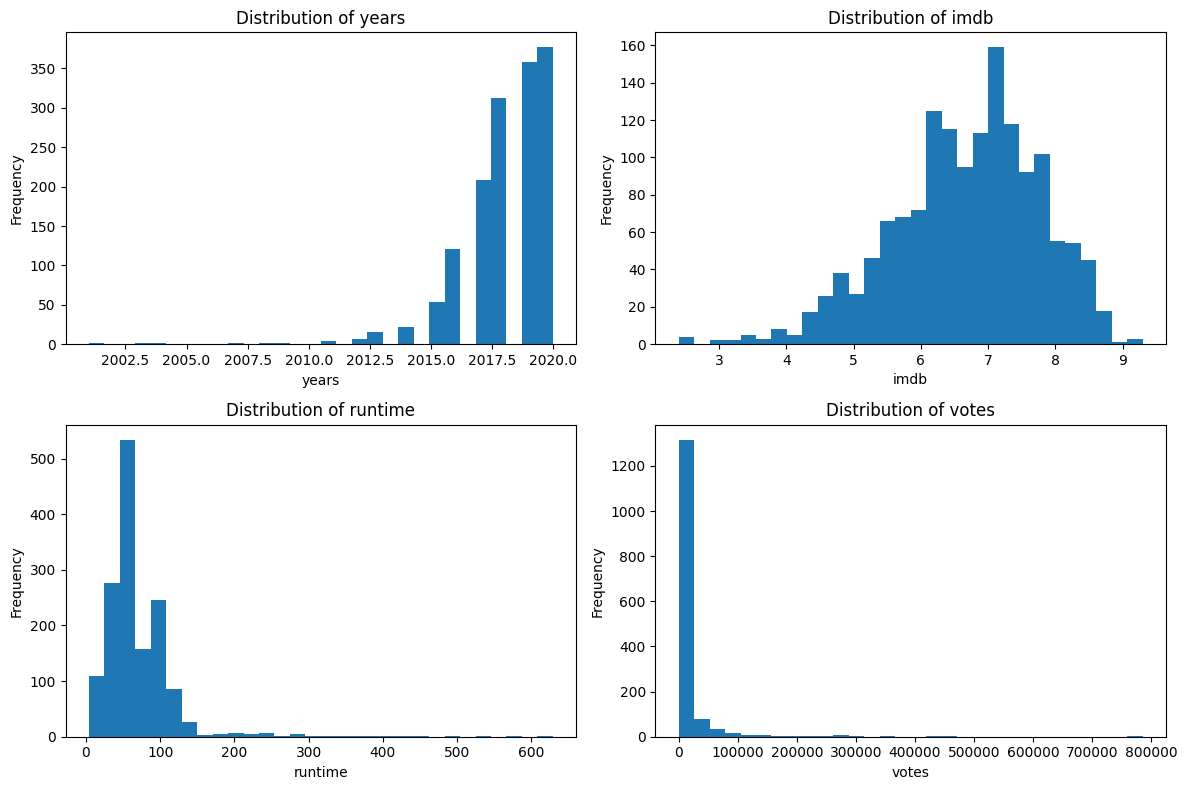

In [71]:
numeric_cols = ['years', 'imdb', 'runtime', 'votes']

plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## #6 Plot the bar chart for top 10 genres.

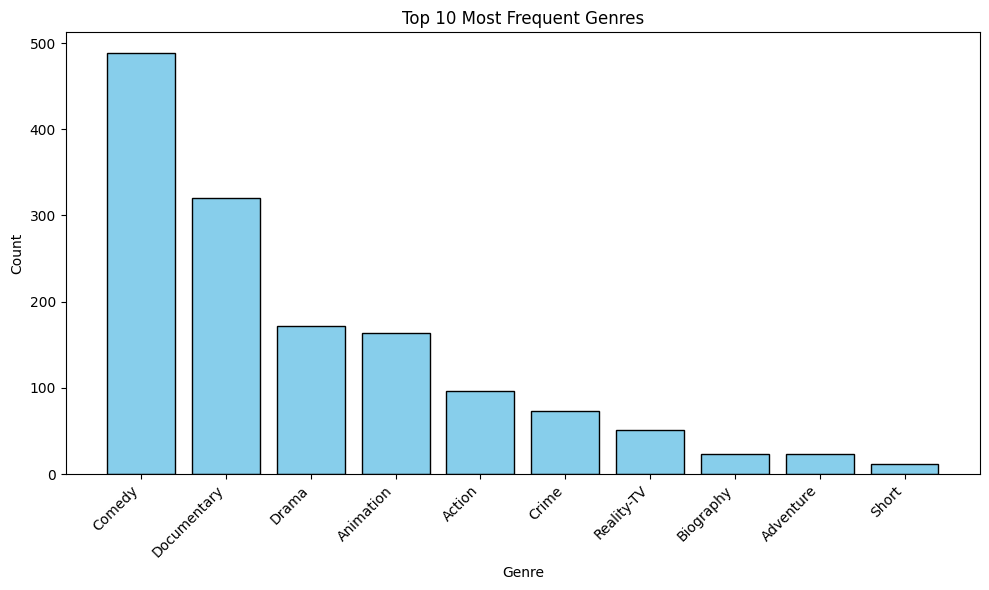

In [72]:
genre_counts = df['first_genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue', edgecolor='black')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## #7 Plot the line chart for the number of releases per year.

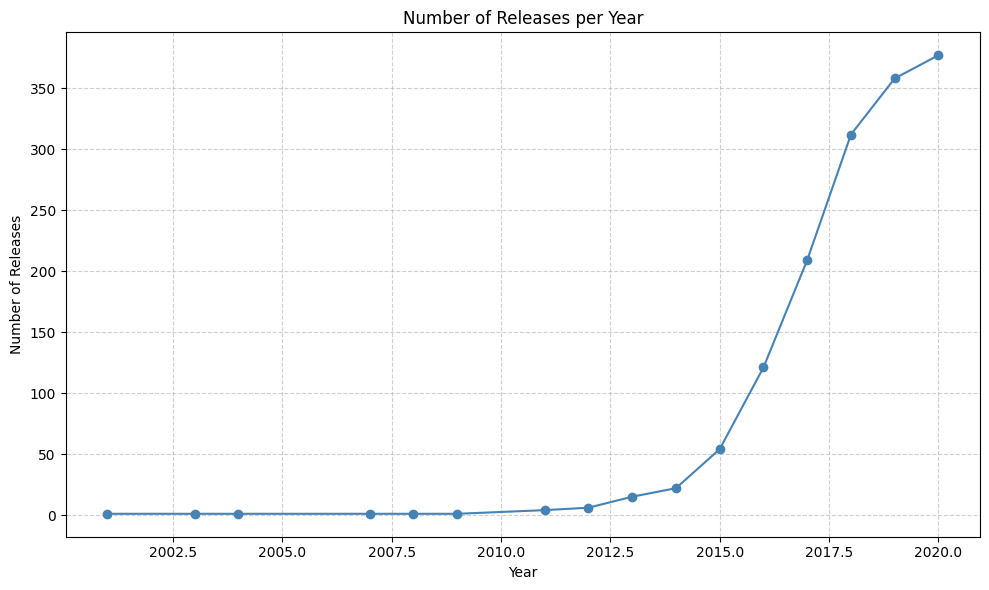

In [73]:
releases_per_year = df['years'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(releases_per_year.index, releases_per_year.values, marker='o', color='steelblue')
plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## #8 Plot the sunburst chart for the distribution of genres by content type. (Use plotly library).

In [74]:
fig = px.sunburst(
    df,
    path=['type', 'first_genre'],
    title='Distribution of First Genres by Content Type',
    color='type',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    title_x=0.5,
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

## #9 Perform encoding on the categorical data. Choose between label encoding, one hot encoding or ordinal encoding and provide a clear justification for choosing a particular encoding method.

In [75]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['titles', 'genres', 'description', 'stars', 'type', 'original',
       'first_genre'],
      dtype='object')


In [76]:
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])
df['original_encoded'] = label_encoder.fit_transform(df['original'])

df = pd.get_dummies(df, columns=['first_genre'], prefix='genre')

print(df.head())

                  titles  years                 genres  imdb  runtime  \
0  Zumbo's Just Desserts   2016             Reality-TV   6.9     52.0   
1              Zona Rosa   2019                 Comedy   6.0     62.0   
2        Young Wallander   2020  Crime, Drama, Mystery   6.7     62.0   
3           You vs. Wild   2019  Adventure, Reality-TV   6.7     20.0   
4                    You   2018  Crime, Drama, Romance   7.8     45.0   

                                         description  \
0  Amateur Australian chefs compete to impress pa...   
1                                         Add a Plot   
2  Follow recently graduated police officer Kurt ...   
3  In this interactive series, you'll make key de...   
4  A dangerously charming, intensely obsessive yo...   

                                               stars     votes     type  \
0           Gigi Falanga, Rachel Khoo, Adriano Zumbo    1779.0  TV Show   
1  Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...      33.0  TV Show   

## #10 Identify if there are any outliers in the data. If so, handle the outliers (Refer to the lecture notebook).

years: 16 outliers


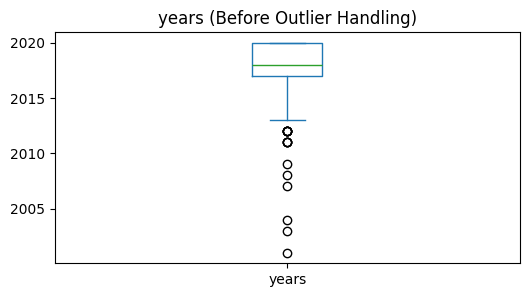

imdb: 17 outliers


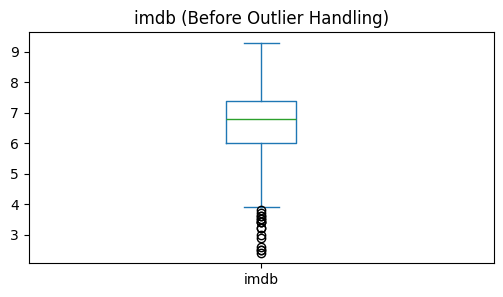

runtime: 45 outliers


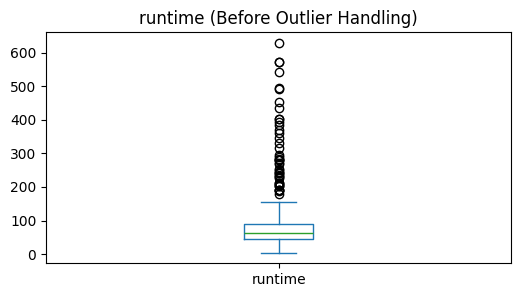

votes: 207 outliers


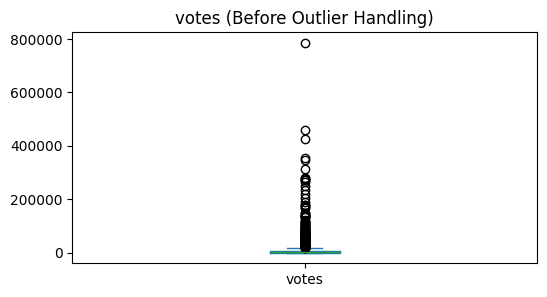

In [77]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f'{col}: {len(outliers)} outliers')

    # Optional: visualize
    df[col].plot(kind='box', title=f'{col} (Before Outlier Handling)', figsize=(6,3))
    plt.show()

In [78]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

print(df[numeric_cols].describe())


             years         imdb      runtime         votes
count  1484.000000  1484.000000  1484.000000   1484.000000
mean   2018.167116     6.687466    67.946429   5479.469845
std       1.685797     1.075688    32.623540   6730.273528
min    2012.500000     3.900000     4.000000      5.000000
25%    2017.000000     6.000000    45.000000    592.750000
50%    2018.000000     6.800000    62.000000   2070.500000
75%    2020.000000     7.400000    90.000000   7956.750000
max    2020.000000     9.300000   157.500000  19002.750000


## #11 If given an option to replace the outliers with 0, would you do that? Why or why not? Provide clear justification.

I would not replace outliers with 0, because doing so introduces false information, distorts the data distribution, and can harm model performance.
Instead, I would handle them through removal, capping, or transformation, depending on the variable and business context.

## #12 Perform all feature scaling techniques using StandardScaler, MinMaxScaler and RobustScaler. Which method is the most appropriate for this data and why? Please provide a clear explanation.

In [79]:
X_numeric = df[numeric_cols]

scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X_numeric)

scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X_numeric)

scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X_numeric)

In [80]:
scaled_dfs = {
    'StandardScaler': pd.DataFrame(X_standard, columns=numeric_cols),
    'MinMaxScaler': pd.DataFrame(X_minmax, columns=numeric_cols),
    'RobustScaler': pd.DataFrame(X_robust, columns=numeric_cols)
}

for name, data in scaled_dfs.items():
    print(f'\n{name} result summary:\n')
    print(data.describe().round(2))


StandardScaler result summary:

         years     imdb  runtime    votes
count  1484.00  1484.00  1484.00  1484.00
mean      0.00    -0.00     0.00    -0.00
std       1.00     1.00     1.00     1.00
min      -3.36    -2.59    -1.96    -0.81
25%      -0.69    -0.64    -0.70    -0.73
50%      -0.10     0.10    -0.18    -0.51
75%       1.09     0.66     0.68     0.37
max       1.09     2.43     2.75     2.01

MinMaxScaler result summary:

         years     imdb  runtime    votes
count  1484.00  1484.00  1484.00  1484.00
mean      0.76     0.52     0.42     0.29
std       0.22     0.20     0.21     0.35
min       0.00     0.00     0.00     0.00
25%       0.60     0.39     0.27     0.03
50%       0.73     0.54     0.38     0.11
75%       1.00     0.65     0.56     0.42
max       1.00     1.00     1.00     1.00

RobustScaler result summary:

         years     imdb  runtime    votes
count  1484.00  1484.00  1484.00  1484.00
mean      0.06    -0.08     0.13     0.46
std       0.56     0.77

I would choose RobustScaler for this dataset because it uses the median and interquartile range, making it resistant to outliers.
Columns like votes and runtime are highly skewed, and applying StandardScaler or MinMaxScaler would let those extreme values dominate the scaling process.
RobustScaler ensures that all features are transformed proportionally without being influenced by extreme observations.